In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import glob
import os
pd.set_option('display.max_columns', None)


# Model Weighting

In [2]:
glac = gl.load_training_data(RGI_input = 'y')
arch = gl.list_architectures(parameterization = '3')

dft = pd.DataFrame()
for architecture in tqdm(arch['layer architecture'].unique()):
#     print(architecture)
    df_glob = gl.load_global_predictions(parameterization = '3', architecture = architecture)
    dft = pd.concat([dft, df_glob])
    
df = dft[[
        'layer architecture','RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
]]

glathida_estimates = pd.merge(glac, df, how = 'inner', on = 'RGIId')

100%|██████████| 161/161 [12:51<00:00,  4.79s/it]


In [3]:
est = glathida_estimates
est

,RGIId,CenLat,CenLon,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,region,size difference,RGI Centroid Distance,AVG Radius,Roundness,distance test,layer architecture,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262,20-15,215.294420,128.128280,145.248750,163.295600,50.584680,178.248580,70.498540,140.002290,220.386960,27.767883,79.940880,181.573100,180.296700,258.276800,184.383580,172.872240,154.213610,185.645840,303.169700,150.603590,118.368190,47.870490,125.572260,210.016940,234.559600
1,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262,3-2,99.453200,23.077267,85.946180,59.019157,38.295574,48.996700,113.523880,17.824757,90.061010,8.113265,48.996700,97.841965,48.996700,8.302902,120.428930,42.058914,10.462499,47.653896,48.996700,30.207865,72.477110,95.081890,22.167380,74.257675,31.238134
2,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262,4-2,58.192936,38.968580,161.178620,104.599330,121.800290,48.996700,48.996700,48.124980,244.111720,24.648956,47.735233,6.346406,140.086440,48.905010,48.996700,5.922468,173.582900,184.265990,140.780240,77.462135,48.833860,120.135640,48.996700,8.671880,48.996700
3,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262,5-2,44.157280,48.996700,127.860270,46.408154,112.964020,221.181210,89.358475,163.627440,118.110860,59.440120,159.989700,21.823736,54.370743,4.125096,61.356426,69.073235,6.981810,124.357400,71.248360,126.408120,26.072190,11.079396,232.216740,151.581390,140.494890
4,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262,6-2,39.976670,48.996700,47.732506,119.663850,176.450100,179.845100,31.826735,267.169530,66.894920,120.730960,48.996700,254.232640,185.135710,61.830303,129.687740,46.635834,31.863089,47.923775,32.429950,32.518852,19.931728,48.996700,98.823390,82.184950,91.262985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80495,RGI60-19.02062,-62.615300,-60.285600,36.537,10,-999,870,3.6,189,10451,265.0,19,0.676009,2575.103743,3410.291529,0.326312,0.755098,20-14,48.937473,74.785970,58.268063,56.020878,53.884144,61.119865,62.766922,61.046074,49.259980,70.412125,47.730927,46.975310,48.339863,68.529510,67.624870,61.254550,48.011654,46.463226,62.467197,66.887370,37.555490,69.839550,56.801823,60.551517,57.418920
80496,RGI60-19.02062,-62.615300,-60.285600,36.537,10,-999,870,3.6,189,10451,265.0,19,0.676009,2575.103743,3410.291529,0.326312,0.755098,16-15,57.617466,75.550760,65.142240,26.732044,59.726543,44.802074,55.939816,44.413544,48.234207,57.785780,71.366790,43.061375,55.436802,48.550420,56.904360,56.288017,68.593500,51.373710,45.084797,77.725890,52.244110,59.092050,54.940525,53.352960,51.619390
80497,RGI60-19.02062,-62.615300,-60.285600,36.537,10,-999,870,3.6,189,10451,265.0,19,0.676009,2575.103743,3410.291529,0.326312,0.755098,17-15,56.093586,59.962486,70.325610,42.282207,55.318344,70.058810,57.458780,74.066240,62.992950,44.871560,60.932600,55.764774,56.411910,50.780148,42.540760,40.999958,62.388107,45.995308,59.779583,55.862850,67.471160,61.904377,60.149960,54.945620,59.670734
80498,RGI60-19.02062,-62.615300,-60.285600,36.537,10,-999,870,3.6,189,10451,265.0,19,0.676009,2575.103743,3410.291529,0.326312,0.755098,18-15,49.275337,56.720560,69.887280,47.296280,59.606060,57.936657,59.249245,48.570793,64.322570,51.706604,43.939156,49.376470,45.089725,54.907170,50.327717,62.003357,50.598910,64.574135,49.375122,74.580956,57.752335,57.293102,54.827520,67.947170,66.057610


In [4]:
for i in range(0,25,1):
    est['pr_'+str(i)] = (est[str(i)] - est['Thickness']) / est['Thickness']

In [5]:
model_list = [
     '0', '1', '2', '3', '4', '5', '6', '7', '8',
     '9', '10', '11', '12', '13', '14', '15', '16',
     '17', '18', '19', '20', '21', '22', '23', '24',
]
pool_list = [
     'pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8',
     'pr_9', 'pr_10', 'pr_11', 'pr_12', 'pr_13', 'pr_14', 'pr_15', 'pr_16',
     'pr_17', 'pr_18', 'pr_19', 'pr_20', 'pr_21', 'pr_22', 'pr_23', 'pr_24',
]
weight_list = [
     'w_0', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8',
     'w_9', 'w_10', 'w_11', 'w_12', 'w_13', 'w_14', 'w_15', 'w_16',
     'w_17', 'w_18', 'w_19', 'w_20', 'w_21', 'w_22', 'w_23', 'w_24',
]

# By Architecture

In [42]:
weights = pd.DataFrame()
architecture_weights = pd.DataFrame()
for i in tqdm(est['layer architecture'].unique()):
#     print(i)
    dft = est[est['layer architecture'] == str(i)]
#     print(np.nanmean(dft[pool_list]))
#     print(
#         np.nanstd(dft[pool_list].to_numpy())
#     )
    bias = dft[pool_list].mean().mean()
#     print(bias)
    std = np.std(dft[pool_list].to_numpy())
#     print(std)
    w = pd.Series(
        abs(np.nanmean(dft[pool_list])) + np.nanstd(dft[pool_list].to_numpy())**2, 
        name = 'weight'
    )
#     print(w)
#     break
    architecture_weights = pd.concat([architecture_weights, w])
    architecture_weights = architecture_weights.reset_index()
    architecture_weights = architecture_weights.drop('index', axis = 1)
    architecture_weights.loc[architecture_weights.index[-1], 'layer architecture'] = i
    architecture_weights.loc[architecture_weights.index[-1], 'bias'] = bias
    architecture_weights.loc[architecture_weights.index[-1], 'std'] = std

architecture_weights

100%|██████████| 161/161 [00:01<00:00, 117.67it/s]


,0,bias,layer architecture,std
0,4.980728,1.242544,20-15,1.933439
1,3.829626,0.802568,3-2,1.739844
2,3.075341,0.648181,4-2,1.557935
3,4.226846,0.948647,5-2,1.810580
4,3.873576,0.889458,6-2,1.727460
...,...,...,...,...
156,4.692032,1.175883,20-14,1.875140
157,4.738798,1.177838,16-15,1.887051
158,4.714324,1.189454,17-15,1.877464
159,4.691836,1.173666,18-15,1.875679


In [44]:
architecture_weights = architecture_weights.rename(columns = {0:'architecture weight'})
architecture_weights = architecture_weights.append(architecture_weights.loc[0])
architecture_weights = architecture_weights.reset_index()
architecture_weights = architecture_weights.drop(0)
architecture_weights = architecture_weights.drop('index', axis = 1)
architecture_weights = architecture_weights.reset_index()
architecture_weights = architecture_weights.drop('index', axis = 1)
architecture_weights

,architecture weight,bias,layer architecture,std
0,3.829626,0.802568,3-2,1.739844
1,3.075341,0.648181,4-2,1.557935
2,4.226846,0.948647,5-2,1.810580
3,3.873576,0.889458,6-2,1.727460
4,3.831729,0.831022,7-2,1.732255
...,...,...,...,...
156,4.738798,1.177838,16-15,1.887051
157,4.714324,1.189454,17-15,1.877464
158,4.691836,1.173666,18-15,1.875679
159,4.811138,1.196636,19-15,1.901184


In [45]:
architecture_weights['var'] = architecture_weights['std']**2
architecture_weights

,architecture weight,bias,layer architecture,std,var
0,3.829626,0.802568,3-2,1.739844,3.027058
1,3.075341,0.648181,4-2,1.557935,2.427160
2,4.226846,0.948647,5-2,1.810580,3.278199
3,3.873576,0.889458,6-2,1.727460,2.984118
4,3.831729,0.831022,7-2,1.732255,3.000707
...,...,...,...,...,...
156,4.738798,1.177838,16-15,1.887051,3.560961
157,4.714324,1.189454,17-15,1.877464,3.524870
158,4.691836,1.173666,18-15,1.875679,3.518170
159,4.811138,1.196636,19-15,1.901184,3.614502


In [29]:
architecture_weights.to_csv('architecture_weights.csv')

In [47]:
architecture_weights = pd.read_csv('architecture_weights.csv')
architecture_weights = architecture_weights.drop('Unnamed: 0', axis = 1)
architecture_weights

,architecture weight,layer architecture,bias,std,var
0,4.394030,3-2,0.965023,NaN,NaN
1,3.844883,4-2,0.885663,NaN,NaN
2,4.575157,5-2,1.067628,NaN,NaN
3,4.175520,6-2,1.015992,NaN,NaN
4,4.528104,7-2,1.058611,NaN,NaN
...,...,...,...,...,...
156,4.738798,16-15,1.177838,1.887051,3.560961
157,4.714324,17-15,1.189454,1.877464,3.524870
158,4.691836,18-15,1.173666,1.875679,3.518170
159,4.811138,19-15,1.196636,1.901184,3.614502


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')

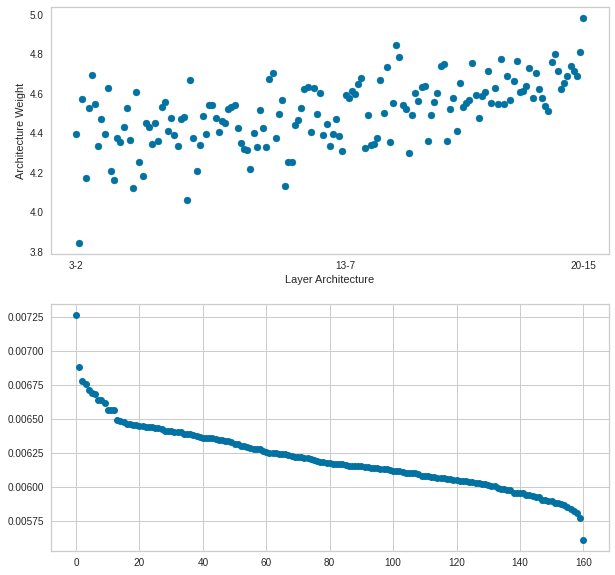

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'])[::-1] / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)

# By individual model

In [34]:
# 'pr' = percent residual

model_weights = pd.DataFrame()

for i in tqdm(est['layer architecture'].unique()):
    dft = est[est['layer architecture'] == str(i)]
    arch_weights = pd.DataFrame()
    for j in (dft['RGIId'].unique()):
        dfr = dft[dft['RGIId'] == j]
        q75, q25 = np.nanpercentile(dfr[pool_list], [75,25])
        for k in range(0,25,1):
            dfr['b_'+str(k)] =   dfr[str(k)] * dfr[pool_list].mean().mean()
            dfr['sig_'+str(k)] = ((q75 - q25) * dfr[str(k)]) / 1.5
            dfr['w_'+str(k)] = abs(dfr['b_'+str(k)]) + dfr['sig_'+str(k)]**2
    
#             break
#         break
        
        arch_weights = pd.concat([arch_weights, dfr[weight_list]])
    arch_weights[weight_list] = arch_weights[weight_list].mean()
    arch_weights['layer architecture'] = i

    model_weights = pd.concat([model_weights, arch_weights])
#     print(model_weights)
#     break
    model_weights = model_weights.drop_duplicates(keep = 'first')
#     break
#     break
model_weights

  1%|          | 1/161 [00:45<2:02:08, 45.80s/it]


KeyboardInterrupt: 

In [35]:
model_weights

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,layer architecture
0,31245.059803,7836.578729,23637.340974,23106.377635,6820.0851,40605.491582,7709.495914,24422.085297,24849.918999,5254.131753,6976.417698,39354.938081,34559.379027,70391.825651,42346.806465,40109.197625,37839.479206,27461.134085,60040.314254,33817.644712,33045.902843,2706.440956,17521.525364,24755.846828,42164.806436,20-15


In [ ]:
model_weights = model_weights.append(model_weights.loc[0])
model_weights = model_weights.reset_index()
model_weights = model_weights.drop('index', axis = 1)
model_weights = model_weights.drop(0)
model_weights = model_weights.reset_index()
model_weights = model_weights.drop('index', axis = 1)
model_weights

In [ ]:
# model_weights.to_csv('model_weights.csv')

In [ ]:
model_weights = pd.read_csv('model_weights.csv')
model_weights

In [ ]:
# model_weights

In [ ]:
# arch_list = model_weights['layer architecture']

In [30]:
parameterization = '3'
print('Compiling predictions...')
arch_list = architecture_weights['layer architecture']
df = pd.DataFrame(columns = {
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
})
for arch in tqdm(arch_list):
    df_glob = gl.load_global_predictions(
        parameterization = parameterization,
        architecture = arch
    )

    df = pd.concat([df,df_glob])
#     break
statistics = pd.DataFrame()
for file in (os.listdir('zults/')):
    if 'statistics_' + parameterization in file:
        file_reader = pd.read_csv('zults/' + file)
        statistics = pd.concat([statistics, file_reader], ignore_index = True)

# df = pd.merge(df, statistics, on = 'layer architecture')
df = df[[
        'layer architecture','RGIId','0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

Compiling predictions...



  2%|▏         | 3/161 [00:03<03:05,  1.18s/it]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [31]:
df

,15,16,4,19,17,RGIId,0,7,20,6,22,8,21,1,23,12,5,2,18,24,10,3,11,9,14,13,Unnamed: 0,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,region,avg predicted thickness,predicted thickness std dev,layer architecture,parameterization
0,48.996700,95.251220,104.661156,114.74711,91.621414,RGI60-01.00001,112.061905,119.421234,112.416595,102.190956,71.935880,77.393005,83.782936,76.607544,70.38122,48.996700,48.996700,90.293780,48.99670,89.143990,48.99670,53.166910,73.513710,108.174324,36.176838,66.488520,0.0,G213177E63689N,20090703.0,-9999999.0,-146.8230,63.6890,1.0,2.0,0.360,1936.0,2725.0,2385.0,42.0,346.0,839.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,1.0,79.776560,25.126255,3-2,3
1,48.996700,102.799750,113.612930,120.07502,100.918200,RGI60-01.00002,117.339480,133.604390,121.725480,108.331800,75.180710,83.707390,88.305110,82.308920,77.15133,48.996700,48.996700,87.709820,48.99670,97.595276,48.99670,50.096695,76.312430,109.575900,28.492880,75.481870,1.0,G213332E63404N,20090703.0,-9999999.0,-146.6680,63.4040,1.0,2.0,0.558,1713.0,2144.0,2005.0,16.0,162.0,1197.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,1.0,83.812355,28.789207,3-2,3
2,48.996700,104.989840,114.711430,122.29173,103.348206,RGI60-01.00003,119.956040,134.832550,123.423416,109.735730,78.736850,85.918970,90.607500,83.992300,77.63349,48.996700,48.996700,86.251030,48.99670,99.460780,48.99670,50.185600,79.219406,112.077920,28.825670,76.354970,2.0,G213920E63376N,20090703.0,-9999999.0,-146.0800,63.3760,1.0,2.0,1.685,1609.0,2182.0,1868.0,18.0,175.0,2106.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,1.0,85.101490,29.460768,3-2,3
3,48.996700,112.574810,122.457530,131.19690,112.750910,RGI60-01.00004,128.773120,141.049270,129.980590,117.868950,87.821670,94.197060,99.123886,91.774376,80.37724,48.996700,48.996700,89.150314,48.99670,104.760230,48.99670,52.925236,87.449190,119.964676,31.323696,80.522260,3.0,G213880E63381N,20090703.0,-9999999.0,-146.1200,63.3810,1.0,2.0,3.681,1273.0,2317.0,1944.0,19.0,195.0,4175.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,1.0,90.441020,32.207336,3-2,3
4,48.996700,108.885430,118.455480,126.42563,107.966370,RGI60-01.00005,123.982240,137.712230,126.675320,113.468820,82.351360,89.891470,94.851270,87.605170,78.96007,48.996700,48.996700,87.844910,48.99670,101.536760,48.99670,51.719967,83.268930,115.048820,30.431380,78.090940,4.0,G212943E63551N,20090703.0,-9999999.0,-147.0570,63.5510,1.0,2.0,2.573,1494.0,2317.0,1914.0,16.0,181.0,2981.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,1.0,87.606240,30.674345,3-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,77.471800,95.483740,87.652145,101.86134,104.205956,RGI60-19.02748,48.996700,99.451090,85.238686,74.112850,90.344980,103.006150,90.385260,48.996700,89.66279,96.544430,97.115500,82.057640,100.80991,87.867980,96.52084,48.996700,95.086860,95.607155,98.803720,79.065445,216496.0,G322268E53986S,20020502.0,-9999999.0,-37.7325,-53.9860,19.0,3.0,0.042,310.0,510.0,-999.0,29.9,315.0,255.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,19.0,87.013850,16.412280,5-2,3
216497,79.769264,107.797424,93.862820,99.37702,105.959030,RGI60-19.02749,48.996700,106.015625,93.088710,75.333310,88.626076,106.931526,93.089485,48.996700,94.39081,99.846110,106.310910,80.267020,104.26867,93.239330,94.88374,48.996700,97.077460,106.261360,103.850230,74.936490,216497.0,G323864E54831S,20030207.0,-9999999.0,-36.1361,-54.8310,19.0,3.0,0.567,330.0,830.0,-999.0,23.6,200.0,1130.0,0.0,0.0,0.0,0.0,9.0,9.0,NaN,19.0,90.086890,18.314432,5-2,3
216498,81.752590,98.698190,91.903440,103.81577,109.120710,RGI60-19.02750,48.996700,103.834880,95.198660,81.036575,102.752335,104.273500,100.667090,48.996700,103.72174,107.055275,105.858180,83.218834,106.92802,94.337616,106.13039,48.996700,99.097420,103.848236,104.468000,80.059560,216498.0,G322698E54188S,20030207.0,-9999999.0,-37.3018,-54.1884,19.0,3.0,4

In [16]:
compiled_raw = df.groupby('RGIId')[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]

In [33]:
for this_rgi_id, obj in tqdm(compiled_raw):
#     print(obj['layer architecture'])
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
    print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = obj[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
    architecture_weights = pd.read_csv('architecture_weights.csv')
    architecture_weights = architecture_weights.drop('Unnamed: 0', axis = 1)
    
    obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     print(obj)
    arch_weight = obj[['architecture weight']]
    
    aw = arch_weight.values.flatten()

#     print(arch_weight)
    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
    pr = np.array(predictions.values)
    weighted_mean = 0
    for p, w in zip(pr, aw):
#         print(p)
#         print(w)
#         print(p/w)
    #     break
        weighted_mean = weighted_mean + (p/w)
    weighted_mean = weighted_mean.mean().mean() / sum(1/aw)
    print(weighted_mean)
#     print(predictions)
#     print('')
#     print(arch_weight)
    
    print('plain mean = ' + str(predictions.mean().mean()))
    std = np.nanstd(predictions, axis = 1)
#     print(np.nanstd(predictions, axis = 1))
    print('weighted mean = ' + str(
        np.nansum(
            predictions.div(
            arch_weight.values).values) / np.nansum(1/arch_weight.values)
    ) 
    )
    print('')
#     print(        np.nansum(
#             predictions.div(
#             arch_weight.values).values))
#     print(np.nansum(1/arch_weight.values))
#     break
#     print(obj)
#     break
# obj

  0%|          | 13/216501 [00:09<31:56:45,  1.88it/s]

0    RGI60-01.00001
Name: RGIId, dtype: object
88.64766776385227
plain mean = 88.69563757267082
weighted mean = 2216.1916940963056

0    RGI60-01.00002
Name: RGIId, dtype: object
93.5925363603844
plain mean = 93.64346260024845
weighted mean = 2339.813409009608

0    RGI60-01.00003
Name: RGIId, dtype: object
94.17012956850519
plain mean = 94.22000172968944
weighted mean = 2354.253239212629

0    RGI60-01.00004
Name: RGIId, dtype: object
98.06446414327364
plain mean = 98.11329023627327
weighted mean = 2451.6116035818395

0    RGI60-01.00005
Name: RGIId, dtype: object
95.94831511747681
plain mean = 95.99766263403725
weighted mean = 2398.7078779369194

0    RGI60-01.00006
Name: RGIId, dtype: object
111.01874276285227
plain mean = 111.06623309167702
weighted mean = 2775.4685690713054

0    RGI60-01.00007
Name: RGIId, dtype: object
95.46041415653232
plain mean = 95.50978854807454
weighted mean = 2386.510353913307

0    RGI60-01.00008
Name: RGIId, dtype: object
89.70564730780463
plain mean = 

  0%|          | 37/216501 [00:09<7:52:28,  7.64it/s] 

96.01284040444828
plain mean = 96.06217288844721
weighted mean = 2400.3210101112054

0    RGI60-01.00024
Name: RGIId, dtype: object
95.62888814056707
plain mean = 95.67822965838508
weighted mean = 2390.7222035141754

0    RGI60-01.00025
Name: RGIId, dtype: object
96.05123619993238
plain mean = 96.09419041142857
weighted mean = 2401.280904998308

0    RGI60-01.00026
Name: RGIId, dtype: object
91.90522417384933
plain mean = 91.95565859726709
weighted mean = 2297.630604346232

0    RGI60-01.00027
Name: RGIId, dtype: object
108.42902042977961
plain mean = 108.47580459999999
weighted mean = 2710.7255107444894

0    RGI60-01.00028
Name: RGIId, dtype: object
87.08147613303593
plain mean = 87.13088626559006
weighted mean = 2177.036903325897

0    RGI60-01.00029
Name: RGIId, dtype: object
90.32859729400249
plain mean = 90.3736250037267
weighted mean = 2258.2149323500607

0    RGI60-01.00030
Name: RGIId, dtype: object
108.8056441005619
plain mean = 108.85936709788821
weighted mean = 2720.1411025

  0%|          | 61/216501 [00:10<3:23:45, 17.70it/s]

114.82787918342673
plain mean = 114.99110133950312
weighted mean = 2870.6969795856667

0    RGI60-01.00047
Name: RGIId, dtype: object
85.41346322945793
plain mean = 85.4619318636025
weighted mean = 2135.336580736447

0    RGI60-01.00048
Name: RGIId, dtype: object
83.37265623572566
plain mean = 83.41863325217392
weighted mean = 2084.3164058931407

0    RGI60-01.00049
Name: RGIId, dtype: object
86.9569874729123
plain mean = 87.00011981763976
weighted mean = 2173.924686822806

0    RGI60-01.00050
Name: RGIId, dtype: object
98.96165783233248
plain mean = 99.01262753788818
weighted mean = 2474.0414458083105

0    RGI60-01.00051
Name: RGIId, dtype: object
85.464158575923
plain mean = 85.51218326658385
weighted mean = 2136.6039643980735

0    RGI60-01.00052
Name: RGIId, dtype: object
86.09754117859218
plain mean = 86.14699882260871
weighted mean = 2152.4385294648037

0    RGI60-01.00053
Name: RGIId, dtype: object
85.35413693073089
plain mean = 85.40323169242237
weighted mean = 2133.8534232682

  0%|          | 85/216501 [00:10<1:48:32, 33.23it/s]

98.07745634313764
plain mean = 98.13117247403727
weighted mean = 2451.936408578439

0    RGI60-01.00070
Name: RGIId, dtype: object
101.02521388851707
plain mean = 101.08030483031057
weighted mean = 2525.630347212925

0    RGI60-01.00071
Name: RGIId, dtype: object
92.78006504454979
plain mean = 92.83128342931677
weighted mean = 2319.501626113743

0    RGI60-01.00072
Name: RGIId, dtype: object
89.27453587237463
plain mean = 89.32432470434782
weighted mean = 2231.863396809364

0    RGI60-01.00073
Name: RGIId, dtype: object
89.33884883649593
plain mean = 89.38888717490683
weighted mean = 2233.471220912397

0    RGI60-01.00074
Name: RGIId, dtype: object
94.2632574768017
plain mean = 94.31555029043477
weighted mean = 2356.5814369200402

0    RGI60-01.00075
Name: RGIId, dtype: object
92.99464005930594
plain mean = 93.04601582906831
weighted mean = 2324.8660014826473

0    RGI60-01.00076
Name: RGIId, dtype: object
94.04951132135062
plain mean = 94.1006192042236
weighted mean = 2351.23778303376

  0%|          | 109/216501 [00:10<1:07:58, 53.05it/s]

93.1005352758018
plain mean = 93.15168035428573
weighted mean = 2327.513381895044

0    RGI60-01.00093
Name: RGIId, dtype: object
92.3891067104581
plain mean = 92.43914836024844
weighted mean = 2309.727667761451

0    RGI60-01.00094
Name: RGIId, dtype: object
91.62225425012986
plain mean = 91.67337793341616
weighted mean = 2290.5563562532448

0    RGI60-01.00095
Name: RGIId, dtype: object
95.41788677893796
plain mean = 95.4707934347826
weighted mean = 2385.4471694734475

0    RGI60-01.00096
Name: RGIId, dtype: object
92.6431445994701
plain mean = 92.69242521366459
weighted mean = 2316.0786149867513

0    RGI60-01.00097
Name: RGIId, dtype: object
96.87240842948451
plain mean = 96.92698841962732
weighted mean = 2421.810210737111

0    RGI60-01.00098
Name: RGIId, dtype: object
89.21161677581357
plain mean = 89.26288028919254
weighted mean = 2230.2904193953377

0    RGI60-01.00099
Name: RGIId, dtype: object
93.62122584672056
plain mean = 93.67475605590062
weighted mean = 2340.530646168012


  0%|          | 133/216501 [00:10<49:20, 73.09it/s]  

93.09266412329764
plain mean = 93.14357960521738
weighted mean = 2327.316603082439

0    RGI60-01.00116
Name: RGIId, dtype: object
90.06509888407095
plain mean = 90.11571957987577
weighted mean = 2251.6274721017726

0    RGI60-01.00117
Name: RGIId, dtype: object
92.34322347654609
plain mean = 92.39483154086956
weighted mean = 2308.5805869136507

0    RGI60-01.00118
Name: RGIId, dtype: object
95.74225125772686
plain mean = 95.79067902285715
weighted mean = 2393.556281443171

0    RGI60-01.00119
Name: RGIId, dtype: object
91.48776780477189
plain mean = 91.53328449863355
weighted mean = 2287.1941951192957

0    RGI60-01.00120
Name: RGIId, dtype: object
92.1010795725311
plain mean = 92.1510002968944
weighted mean = 2302.5269893132754

0    RGI60-01.00121
Name: RGIId, dtype: object
100.58411552976432
plain mean = 100.63984849366462
weighted mean = 2514.6028882441065

0    RGI60-01.00122
Name: RGIId, dtype: object
97.04902293202352
plain mean = 97.10003078459627
weighted mean = 2426.22557330

  0%|          | 157/216501 [00:10<40:32, 88.94it/s]

95.74830478414354
plain mean = 95.79653270285715
weighted mean = 2393.7076196035873

0    RGI60-01.00139
Name: RGIId, dtype: object
90.86386158432573
plain mean = 90.91399115180124
weighted mean = 2271.596539608142

0    RGI60-01.00140
Name: RGIId, dtype: object
101.25125126346424
plain mean = 101.30381432397515
weighted mean = 2531.281281586605

0    RGI60-01.00141
Name: RGIId, dtype: object
88.37638225824743
plain mean = 88.42572807627329
weighted mean = 2209.4095564561844

0    RGI60-01.00142
Name: RGIId, dtype: object
91.69061039875737
plain mean = 91.74074004521736
weighted mean = 2292.2652599689327

0    RGI60-01.00143
Name: RGIId, dtype: object
89.66682175682882
plain mean = 89.71749557614906
weighted mean = 2241.670543920719

0    RGI60-01.00144
Name: RGIId, dtype: object
92.54143528213199
plain mean = 92.59088735975156
weighted mean = 2313.5358820532983

0    RGI60-01.00145
Name: RGIId, dtype: object
95.79840147194177
plain mean = 95.84941772372672
weighted mean = 2394.9600367

  0%|          | 181/216501 [00:11<36:17, 99.36it/s]

89.7996894568406
plain mean = 89.85034264
weighted mean = 2244.992236421014

0    RGI60-01.00162
Name: RGIId, dtype: object
95.03963641527255
plain mean = 95.09207701142857
weighted mean = 2375.990910381812

0    RGI60-01.00163
Name: RGIId, dtype: object
87.31199580962893
plain mean = 87.36040446434782
weighted mean = 2182.799895240722

0    RGI60-01.00164
Name: RGIId, dtype: object
91.2649052309427
plain mean = 91.3131390352795
weighted mean = 2281.6226307735665

0    RGI60-01.00165
Name: RGIId, dtype: object
97.941569913468
plain mean = 97.98982120372672
weighted mean = 2448.5392478366994

0    RGI60-01.00166
Name: RGIId, dtype: object
88.49424937163283
plain mean = 88.54340916298138
weighted mean = 2212.3562342908194

0    RGI60-01.00167
Name: RGIId, dtype: object
89.39880987141632
plain mean = 89.44847818459625
weighted mean = 2234.9702467854063

0    RGI60-01.00168
Name: RGIId, dtype: object
88.40744224431974
plain mean = 88.45730452
weighted mean = 2210.186056107992

0    RGI60-0

  0%|          | 205/216501 [00:11<34:11, 105.44it/s]

93.01779048017195
plain mean = 93.06697686086956
weighted mean = 2325.444762004298

0    RGI60-01.00185
Name: RGIId, dtype: object
90.32606098774606
plain mean = 90.37413900223602
weighted mean = 2258.1515246936497

0    RGI60-01.00186
Name: RGIId, dtype: object
90.48717466993719
plain mean = 90.53654647701863
weighted mean = 2262.1793667484285

0    RGI60-01.00187
Name: RGIId, dtype: object
104.43116784218617
plain mean = 104.4800295952795
weighted mean = 2610.7791960546524

0    RGI60-01.00188
Name: RGIId, dtype: object
90.75320664024528
plain mean = 90.80350031229813
weighted mean = 2268.830166006131

0    RGI60-01.00189
Name: RGIId, dtype: object
99.55935717007705
plain mean = 99.6146562141615
weighted mean = 2488.983929251924

0    RGI60-01.00190
Name: RGIId, dtype: object
90.31562969293701
plain mean = 90.3658722404969
weighted mean = 2257.8907423234236

0    RGI60-01.00191
Name: RGIId, dtype: object
92.30121919981679
plain mean = 92.35179680546582
weighted mean = 2307.5304799954

  0%|          | 229/216501 [00:11<33:13, 108.47it/s]

92.87237750163735
plain mean = 92.92374031975154
weighted mean = 2321.809437540932

0    RGI60-01.00208
Name: RGIId, dtype: object
96.99830248425991
plain mean = 97.05292546285715
weighted mean = 2424.957562106497

0    RGI60-01.00209
Name: RGIId, dtype: object
91.89323392840402
plain mean = 91.94476393068324
weighted mean = 2297.3308482100992

0    RGI60-01.00210
Name: RGIId, dtype: object
90.47566385973036
plain mean = 90.52735019776397
weighted mean = 2261.8915964932576

0    RGI60-01.00211
Name: RGIId, dtype: object
90.02719593395238
plain mean = 90.07804634931678
weighted mean = 2250.6798983488084

0    RGI60-01.00212
Name: RGIId, dtype: object
99.46792522851024
plain mean = 99.5236448747826
weighted mean = 2486.698130712755

0    RGI60-01.00213
Name: RGIId, dtype: object
92.33223407056025
plain mean = 92.38257054136646
weighted mean = 2308.3058517640056

0    RGI60-01.00214
Name: RGIId, dtype: object
100.31282174517237
plain mean = 100.36965106335403
weighted mean = 2507.82054362

  0%|          | 241/216501 [00:11<32:54, 109.50it/s]

90.14622523241962
plain mean = 90.19618272546586
weighted mean = 2253.655630810489

0    RGI60-01.00231
Name: RGIId, dtype: object
89.65871304978144
plain mean = 89.70678896944099
weighted mean = 2241.467826244534

0    RGI60-01.00232
Name: RGIId, dtype: object
91.97309832971206
plain mean = 92.02352256571426
weighted mean = 2299.3274582428003

0    RGI60-01.00233
Name: RGIId, dtype: object
96.69308576726833
plain mean = 96.7476957763975
weighted mean = 2417.327144181707

0    RGI60-01.00234
Name: RGIId, dtype: object
96.27391638831146
plain mean = 96.32768266906832
weighted mean = 2406.847909707785

0    RGI60-01.00235
Name: RGIId, dtype: object
94.5984097478796
plain mean = 94.65165517391304
weighted mean = 2364.9602436969885

0    RGI60-01.00236
Name: RGIId, dtype: object
86.55069912127418
plain mean = 86.59910735229815
weighted mean = 2163.7674780318534

0    RGI60-01.00237
Name: RGIId, dtype: object
85.48817943661373
plain mean = 85.53673480819876
weighted mean = 2137.204485915341

  0%|          | 265/216501 [00:11<32:34, 110.66it/s]

90.71291491235503
plain mean = 90.7631708973913
weighted mean = 2267.822872808875

0    RGI60-01.00254
Name: RGIId, dtype: object
99.51728987763221
plain mean = 99.5720758874534
weighted mean = 2487.9322469408035

0    RGI60-01.00255
Name: RGIId, dtype: object
100.09301108129284
plain mean = 100.14861314881988
weighted mean = 2502.3252770323197

0    RGI60-01.00256
Name: RGIId, dtype: object
99.17209535701282
plain mean = 99.22730874633542
weighted mean = 2479.302383925319

0    RGI60-01.00257
Name: RGIId, dtype: object
89.8549237454405
plain mean = 89.90547986285715
weighted mean = 2246.3730936360116

0    RGI60-01.00258
Name: RGIId, dtype: object
94.6716118078027
plain mean = 94.725451042236
weighted mean = 2366.790295195066

0    RGI60-01.00259
Name: RGIId, dtype: object
97.30363581867758
plain mean = 97.35890529142858
weighted mean = 2432.590895466938

0    RGI60-01.00260
Name: RGIId, dtype: object
98.27351497105593
plain mean = 98.32889161888198
weighted mean = 2456.8378742763975


  0%|          | 289/216501 [00:12<32:24, 111.21it/s]

93.95555753138223
plain mean = 94.00846330559006
weighted mean = 2348.888938284554

0    RGI60-01.00277
Name: RGIId, dtype: object
88.66557433688354
plain mean = 88.71490787826086
weighted mean = 2216.6393584220873

0    RGI60-01.00278
Name: RGIId, dtype: object
94.21219951134405
plain mean = 94.26418140173914
weighted mean = 2355.3049877835997

0    RGI60-01.00279
Name: RGIId, dtype: object
91.93907733908127
plain mean = 91.98981821018634
weighted mean = 2298.47693347703

0    RGI60-01.00280
Name: RGIId, dtype: object
95.8513935702613
plain mean = 95.90531130012421
weighted mean = 2396.2848392565306

0    RGI60-01.00281
Name: RGIId, dtype: object
97.94025686477197
plain mean = 97.99530625614906
weighted mean = 2448.5064216192977

0    RGI60-01.00282
Name: RGIId, dtype: object
91.27846272078023
plain mean = 91.32872169714287
weighted mean = 2281.9615680195056

0    RGI60-01.00283
Name: RGIId, dtype: object
89.92993742667423
plain mean = 89.98078415850932
weighted mean = 2248.2484356668

  0%|          | 313/216501 [00:12<32:20, 111.41it/s]

93.20945342067171
plain mean = 93.26089495403727
weighted mean = 2330.236335516791

0    RGI60-01.00300
Name: RGIId, dtype: object
92.50297796500634
plain mean = 92.55275949291926
weighted mean = 2312.5744491251576

0    RGI60-01.00301
Name: RGIId, dtype: object
90.75023369836501
plain mean = 90.80043007453416
weighted mean = 2268.755842459123

0    RGI60-01.00302
Name: RGIId, dtype: object
90.1168267915037
plain mean = 90.16714621937886
weighted mean = 2252.9206697875916

0    RGI60-01.00303
Name: RGIId, dtype: object
89.48585304154967
plain mean = 89.5357309058385
weighted mean = 2237.1463260387404

0    RGI60-01.00304
Name: RGIId, dtype: object
88.13800614938987
plain mean = 88.18820734782607
weighted mean = 2203.450153734745

0    RGI60-01.00305
Name: RGIId, dtype: object
91.16471313582338
plain mean = 91.21513262012421
weighted mean = 2279.1178283955824

0    RGI60-01.00306
Name: RGIId, dtype: object
92.41196673308507
plain mean = 92.46408009118011
weighted mean = 2310.29916832712

  0%|          | 337/216501 [00:12<32:20, 111.39it/s]

92.774185450177
plain mean = 92.82396624496896
weighted mean = 2319.3546362544234

0    RGI60-01.00323
Name: RGIId, dtype: object
92.40847558170009
plain mean = 92.45896637689441
weighted mean = 2310.211889542501

0    RGI60-01.00324
Name: RGIId, dtype: object
93.75976186862678
plain mean = 93.80903875726706
weighted mean = 2343.9940467156675

0    RGI60-01.00325
Name: RGIId, dtype: object
89.82639404137407
plain mean = 89.87745515453416
weighted mean = 2245.6598510343506

0    RGI60-01.00326
Name: RGIId, dtype: object
95.87379794908948
plain mean = 95.9219664178882
weighted mean = 2396.8449487272355

0    RGI60-01.00327
Name: RGIId, dtype: object
87.55109615911367
plain mean = 87.60078016149069
weighted mean = 2188.77740397784

0    RGI60-01.00328
Name: RGIId, dtype: object
88.01219262890862
plain mean = 88.0625014852174
weighted mean = 2200.304815722714

0    RGI60-01.00329
Name: RGIId, dtype: object
87.86242847078563
plain mean = 87.91275864322982
weighted mean = 2196.56071176964

0

  0%|          | 361/216501 [00:12<32:18, 111.49it/s]

93.1618445113659
plain mean = 93.21003708944099
weighted mean = 2329.0461127841468

0    RGI60-01.00346
Name: RGIId, dtype: object
93.78162521214146
plain mean = 93.83089585838508
weighted mean = 2344.540630303535

0    RGI60-01.00347
Name: RGIId, dtype: object
90.69983534622156
plain mean = 90.74807625962733
weighted mean = 2267.4958836555375

0    RGI60-01.00348
Name: RGIId, dtype: object
95.6664528487653
plain mean = 95.71544604074533
weighted mean = 2391.661321219131

0    RGI60-01.00349
Name: RGIId, dtype: object
98.45520125093522
plain mean = 98.508832188323
weighted mean = 2461.3800312733792

0    RGI60-01.00350
Name: RGIId, dtype: object
89.74612666142502
plain mean = 89.79525217962733
weighted mean = 2243.653166535624

0    RGI60-01.00351
Name: RGIId, dtype: object
93.76568860975254
plain mean = 93.8135175669565
weighted mean = 2344.1422152438126

0    RGI60-01.00352
Name: RGIId, dtype: object
97.35406341776728
plain mean = 97.4068770616149
weighted mean = 2433.8515854441803



  0%|          | 385/216501 [00:12<32:19, 111.45it/s]

95.52077177978913
plain mean = 95.56800374608696
weighted mean = 2388.0192944947275

0    RGI60-01.00369
Name: RGIId, dtype: object
94.14955252817195
plain mean = 94.20206114136647
weighted mean = 2353.7388132042975

0    RGI60-01.00370
Name: RGIId, dtype: object
88.5705826155532
plain mean = 88.61996857142856
weighted mean = 2214.264565388829

0    RGI60-01.00371
Name: RGIId, dtype: object
92.5476961694374
plain mean = 92.5986950074534
weighted mean = 2313.6924042359337

0    RGI60-01.00372
Name: RGIId, dtype: object
88.32219210877042
plain mean = 88.37037069614905
weighted mean = 2208.0548027192594

0    RGI60-01.00373
Name: RGIId, dtype: object
93.11795860448461
plain mean = 93.16996317714285
weighted mean = 2327.9489651121144

0    RGI60-01.00374
Name: RGIId, dtype: object
92.70104200498602
plain mean = 92.75009464596273
weighted mean = 2317.52605012465

0    RGI60-01.00375
Name: RGIId, dtype: object
93.603144724502
plain mean = 93.65176065118013
weighted mean = 2340.0786181125486


  0%|          | 409/216501 [00:13<32:21, 111.28it/s]

86.54191648155532
plain mean = 86.59178202509317
weighted mean = 2163.547912038882

0    RGI60-01.00392
Name: RGIId, dtype: object
90.45867593172565
plain mean = 90.50844275751552
weighted mean = 2261.4668982931403

0    RGI60-01.00393
Name: RGIId, dtype: object
87.86900454275221
plain mean = 87.91914797763974
weighted mean = 2196.7251135688034

0    RGI60-01.00394
Name: RGIId, dtype: object
88.5485031237109
plain mean = 88.59821643751553
weighted mean = 2213.7125780927713

0    RGI60-01.00395
Name: RGIId, dtype: object
89.83747549450322
plain mean = 89.88785705490683
weighted mean = 2245.9368873625795

0    RGI60-01.00396
Name: RGIId, dtype: object
88.46739100294097
plain mean = 88.51788083006211
weighted mean = 2211.6847750735233

0    RGI60-01.00397
Name: RGIId, dtype: object
90.40313639754635
plain mean = 90.45402867925465
weighted mean = 2260.078409938657

0    RGI60-01.00398
Name: RGIId, dtype: object
90.67123053491127
plain mean = 90.72165654086957
weighted mean = 2266.780763372

  0%|          | 433/216501 [00:13<32:22, 111.24it/s]

94.24445977768865
plain mean = 94.29567437267082
weighted mean = 2356.111494442214

0    RGI60-01.00415
Name: RGIId, dtype: object
95.66257737679744
plain mean = 95.71272864546584
weighted mean = 2391.564434419935

0    RGI60-01.00416
Name: RGIId, dtype: object
96.18368305597535
plain mean = 96.23498253366459
weighted mean = 2404.592076399382

0    RGI60-01.00417
Name: RGIId, dtype: object
91.5841796035346
plain mean = 91.63377544571429
weighted mean = 2289.604490088364

0    RGI60-01.00418
Name: RGIId, dtype: object
92.11795826124653
plain mean = 92.16794790782609
weighted mean = 2302.9489565311624

0    RGI60-01.00419
Name: RGIId, dtype: object
95.60615984410188
plain mean = 95.65642745217392
weighted mean = 2390.153996102546

0    RGI60-01.00420
Name: RGIId, dtype: object
93.75734544989915
plain mean = 93.80808375329194
weighted mean = 2343.9336362474774

0    RGI60-01.00421
Name: RGIId, dtype: object
92.46553727838698
plain mean = 92.5161271078261
weighted mean = 2311.6384319596737

  0%|          | 457/216501 [00:13<32:23, 111.14it/s]

97.54854497694039
plain mean = 97.60245315975156
weighted mean = 2438.7136244235085

0    RGI60-01.00438
Name: RGIId, dtype: object
89.22813662684099
plain mean = 89.27708929838509
weighted mean = 2230.703415671023

0    RGI60-01.00439
Name: RGIId, dtype: object
89.64437844935844
plain mean = 89.69400782484472
weighted mean = 2241.1094612339593

0    RGI60-01.00440
Name: RGIId, dtype: object
102.48777834234731
plain mean = 102.54256842658386
weighted mean = 2562.194458558681

0    RGI60-01.00441
Name: RGIId, dtype: object
84.91953425223879
plain mean = 84.96765840099378
weighted mean = 2122.9883563059684

0    RGI60-01.00442
Name: RGIId, dtype: object
92.24003632318869
plain mean = 92.29056148546584
weighted mean = 2306.0009080797163

0    RGI60-01.00443
Name: RGIId, dtype: object
89.64720354470288
plain mean = 89.69741260770186
weighted mean = 2241.1800886175706

0    RGI60-01.00444
Name: RGIId, dtype: object
98.67825076879814
plain mean = 98.73126150260869
weighted mean = 2466.956269

  0%|          | 481/216501 [00:13<32:23, 111.15it/s]

84.37683652772746
plain mean = 84.42471909316771
weighted mean = 2109.4209131931852

0    RGI60-01.00461
Name: RGIId, dtype: object
86.29852103734964
plain mean = 86.34679950211179
weighted mean = 2157.4630259337396

0    RGI60-01.00462
Name: RGIId, dtype: object
85.46144700606717
plain mean = 85.51022444496894
weighted mean = 2136.5361751516784

0    RGI60-01.00463
Name: RGIId, dtype: object
85.25711805320147
plain mean = 85.30587980496894
weighted mean = 2131.4279513300353

0    RGI60-01.00464
Name: RGIId, dtype: object
86.73557133600046
plain mean = 86.78509388124223
weighted mean = 2168.3892834000103

0    RGI60-01.00465
Name: RGIId, dtype: object
89.16171189288289
plain mean = 89.21212209962734
weighted mean = 2229.0427973220712

0    RGI60-01.00466
Name: RGIId, dtype: object
93.57564303915001
plain mean = 93.62823150757764
weighted mean = 2339.391075978749

0    RGI60-01.00467
Name: RGIId, dtype: object
85.36547823950092
plain mean = 85.41422038434783
weighted mean = 2134.1369559

  0%|          | 505/216501 [00:13<32:24, 111.08it/s]

91.44441646357868
plain mean = 91.49658977316773
weighted mean = 2286.110411589466

0    RGI60-01.00484
Name: RGIId, dtype: object
96.57679339347285
plain mean = 96.62998278037267
weighted mean = 2414.41983483682

0    RGI60-01.00485
Name: RGIId, dtype: object
96.72473937838976
plain mean = 96.77782339925464
weighted mean = 2418.1184844597415

0    RGI60-01.00486
Name: RGIId, dtype: object
92.27005506711579
plain mean = 92.31822758434782
weighted mean = 2306.7513766778943

0    RGI60-01.00487
Name: RGIId, dtype: object
97.26832761265294
plain mean = 97.32206622832298
weighted mean = 2431.7081903163225

0    RGI60-01.00488
Name: RGIId, dtype: object
93.09088707867585
plain mean = 93.14415202732918
weighted mean = 2327.2721769668956

0    RGI60-01.00489
Name: RGIId, dtype: object
85.94563284709199
plain mean = 85.99435305018635
weighted mean = 2148.6408211772987

0    RGI60-01.00490
Name: RGIId, dtype: object
84.66020574241396
plain mean = 84.7088886273292
weighted mean = 2116.5051435603

  0%|          | 517/216501 [00:14<32:24, 111.05it/s]

87.51465255273395
plain mean = 87.5634786827329
weighted mean = 2187.866313818348

0    RGI60-01.00507
Name: RGIId, dtype: object
97.75414514566164
plain mean = 97.80889706708075
weighted mean = 2443.853628641539

0    RGI60-01.00508
Name: RGIId, dtype: object
98.86884547896051
plain mean = 98.9226748884472
weighted mean = 2471.721136974011

0    RGI60-01.00509
Name: RGIId, dtype: object
92.79273325665905
plain mean = 92.84602744521739
weighted mean = 2319.818331416475

0    RGI60-01.00510
Name: RGIId, dtype: object
87.44501437302131
plain mean = 87.49393580645963
weighted mean = 2186.1253593255315

0    RGI60-01.00511
Name: RGIId, dtype: object
89.18024123775272
plain mean = 89.23020875031055
weighted mean = 2229.5060309438163

0    RGI60-01.00512
Name: RGIId, dtype: object
95.26907558329982
plain mean = 95.32332570037268
weighted mean = 2381.726889582494

0    RGI60-01.00513
Name: RGIId, dtype: object
89.26578920250142
plain mean = 89.31572433540371
weighted mean = 2231.644730062534


  0%|          | 541/216501 [00:14<32:29, 110.76it/s]

91.01229210093948
plain mean = 91.06219241391304
weighted mean = 2275.3073025234853

0    RGI60-01.00530
Name: RGIId, dtype: object
85.0647015875943
plain mean = 85.11189383006212
weighted mean = 2126.617539689856

0    RGI60-01.00531
Name: RGIId, dtype: object
91.0202893465132
plain mean = 91.06983628
weighted mean = 2275.507233662829

0    RGI60-01.00532
Name: RGIId, dtype: object
89.38565441397702
plain mean = 89.43538392869564
weighted mean = 2234.6413603494248

0    RGI60-01.00533
Name: RGIId, dtype: object
92.28095893227014
plain mean = 92.33047273118012
weighted mean = 2307.0239733067515

0    RGI60-01.00534
Name: RGIId, dtype: object
90.74994133121989
plain mean = 90.79971452223603
weighted mean = 2268.748533280496

0    RGI60-01.00535
Name: RGIId, dtype: object
96.08773950464119
plain mean = 96.13939570683229
weighted mean = 2402.193487616029

0    RGI60-01.00536
Name: RGIId, dtype: object
96.81398272041086
plain mean = 96.86475541440994
weighted mean = 2420.34956801027

0    

  0%|          | 565/216501 [00:14<32:37, 110.29it/s]

weighted mean = 2078.290216674293

0    RGI60-01.00552
Name: RGIId, dtype: object
93.39354650315455
plain mean = 93.44128630335403
weighted mean = 2334.8386625788635

0    RGI60-01.00553
Name: RGIId, dtype: object
85.96210208791277
plain mean = 86.00899826931678
weighted mean = 2149.0525521978184

0    RGI60-01.00554
Name: RGIId, dtype: object
89.61351576999009
plain mean = 89.66126399925466
weighted mean = 2240.337894249751

0    RGI60-01.00555
Name: RGIId, dtype: object
102.36943725015871
plain mean = 102.42253405440994
weighted mean = 2559.2359312539656

0    RGI60-01.00556
Name: RGIId, dtype: object
72.6387514676237
plain mean = 72.6957571192795
weighted mean = 1815.9687866905917

0    RGI60-01.00557
Name: RGIId, dtype: object
91.54960026058615
plain mean = 91.58953788670806
weighted mean = 2288.740006514651

0    RGI60-01.00558
Name: RGIId, dtype: object
96.10002373829816
plain mean = 96.14616126832297
weighted mean = 2402.500593457453

0    RGI60-01.00559
Name: RGIId, dtype: obje

  0%|          | 589/216501 [00:14<32:34, 110.46it/s]

99.02613853841287
plain mean = 99.07066932571428
weighted mean = 2475.65346346032

0    RGI60-01.00575
Name: RGIId, dtype: object
93.32210341633967
plain mean = 93.3739874183851
weighted mean = 2333.052585408491

0    RGI60-01.00576
Name: RGIId, dtype: object
71.70497692166144
plain mean = 71.75802367927949
weighted mean = 1792.6244230415352

0    RGI60-01.00577
Name: RGIId, dtype: object
83.92050084064827
plain mean = 83.96645043776398
weighted mean = 2098.0125210162055

0    RGI60-01.00578
Name: RGIId, dtype: object
65.03605755882788
plain mean = 65.07040116491926
weighted mean = 1625.9014389706954

0    RGI60-01.00579
Name: RGIId, dtype: object
97.28510770676039
plain mean = 97.32814875478262
weighted mean = 2432.127692669008

0    RGI60-01.00580
Name: RGIId, dtype: object
91.32558435236724
plain mean = 91.3748059495652
weighted mean = 2283.139608809179

0    RGI60-01.00581
Name: RGIId, dtype: object
97.82910388289334
plain mean = 97.87438615801243
weighted mean = 2445.7275970723326

  0%|          | 613/216501 [00:14<32:35, 110.40it/s]


95.96490198862455
plain mean = 96.01510334360248
weighted mean = 2399.122549715612

0    RGI60-01.00598
Name: RGIId, dtype: object
94.98800905228381
plain mean = 95.03953969838511
weighted mean = 2374.7002263070935

0    RGI60-01.00599
Name: RGIId, dtype: object
96.19451153296878
plain mean = 96.24664707279503
weighted mean = 2404.8627883242184

0    RGI60-01.00600
Name: RGIId, dtype: object
94.74525700014107
plain mean = 94.79447873093167
weighted mean = 2368.6314250035252

0    RGI60-01.00601
Name: RGIId, dtype: object
88.00631235620415
plain mean = 88.0536264973913
weighted mean = 2200.157808905103

0    RGI60-01.00602
Name: RGIId, dtype: object
90.33465064198596
plain mean = 90.38140146062113
weighted mean = 2258.366266049648

0    RGI60-01.00603
Name: RGIId, dtype: object
96.37211000499005
plain mean = 96.42533430037267
weighted mean = 2409.30275012475

0    RGI60-01.00604
Name: RGIId, dtype: object
89.7674555134057
plain mean = 89.81403949639751
weighted mean = 2244.18638783514


  0%|          | 637/216501 [00:15<32:33, 110.51it/s]

98.04816889176284
plain mean = 98.10109207527952
weighted mean = 2451.2042222940695

0    RGI60-01.00620
Name: RGIId, dtype: object
90.12258569856178
plain mean = 90.16913132074535
weighted mean = 2253.0646424640427

0    RGI60-01.00621
Name: RGIId, dtype: object
87.40841078872147
plain mean = 87.45517397242236
weighted mean = 2185.2102697180353

0    RGI60-01.00622
Name: RGIId, dtype: object
87.74134768144732
plain mean = 87.78891707875775
weighted mean = 2193.533692036182

0    RGI60-01.00623
Name: RGIId, dtype: object
94.1780804819207
plain mean = 94.22970510062112
weighted mean = 2354.452012048016

0    RGI60-01.00624
Name: RGIId, dtype: object
97.76298829088088
plain mean = 97.81388161093166
weighted mean = 2444.07470727202

0    RGI60-01.00625
Name: RGIId, dtype: object
89.45578610889768
plain mean = 89.50320128819874
weighted mean = 2236.3946527224407

0    RGI60-01.00626
Name: RGIId, dtype: object
92.35121483928252
plain mean = 92.40208269267082
weighted mean = 2308.78037098206

  0%|          | 661/216501 [00:15<32:31, 110.58it/s]

93.74307477298892
plain mean = 93.79436690559008
weighted mean = 2343.5768693247214

0    RGI60-01.00643
Name: RGIId, dtype: object
91.02517993550953
plain mean = 91.0733116221118
weighted mean = 2275.6294983877374

0    RGI60-01.00644
Name: RGIId, dtype: object
85.36871529021451
plain mean = 85.4155128531677
weighted mean = 2134.217882255362

0    RGI60-01.00645
Name: RGIId, dtype: object
96.54588903494451
plain mean = 96.59874547577641
weighted mean = 2413.647225873611

0    RGI60-01.00646
Name: RGIId, dtype: object
93.0807563053507
plain mean = 93.13048001316771
weighted mean = 2327.018907633767

0    RGI60-01.00647
Name: RGIId, dtype: object
89.3602185230877
plain mean = 89.40785104447207
weighted mean = 2234.005463077192

0    RGI60-01.00648
Name: RGIId, dtype: object
86.17335234829785
plain mean = 86.21943472124225
weighted mean = 2154.3338087074453

0    RGI60-01.00649
Name: RGIId, dtype: object
97.85292266128411
plain mean = 97.90512634658384
weighted mean = 2446.3230665321016


  0%|          | 685/216501 [00:15<32:31, 110.56it/s]


91.50334257146908
plain mean = 91.55031557291925
weighted mean = 2287.583564286726

0    RGI60-01.00666
Name: RGIId, dtype: object
98.55853485845442
plain mean = 98.60902452944102
weighted mean = 2463.9633714613587

0    RGI60-01.00667
Name: RGIId, dtype: object
95.87454131668541
plain mean = 95.9270287247205
weighted mean = 2396.8635329171343

0    RGI60-01.00668
Name: RGIId, dtype: object
86.91552867375864
plain mean = 86.96330556546583
weighted mean = 2172.888216843965

0    RGI60-01.00669
Name: RGIId, dtype: object
91.00595921751518
plain mean = 91.05414242782608
weighted mean = 2275.148980437878

0    RGI60-01.00670
Name: RGIId, dtype: object
98.09475396625338
plain mean = 98.14462150708074
weighted mean = 2452.3688491563325

0    RGI60-01.00671
Name: RGIId, dtype: object
87.08039295655232
plain mean = 87.12721083403729
weighted mean = 2177.009823913807

0    RGI60-01.00672
Name: RGIId, dtype: object
87.54509987754183
plain mean = 87.59213482434785
weighted mean = 2188.6274969385

  0%|          | 709/216501 [00:15<32:32, 110.52it/s]

91.6965002215283
plain mean = 91.74492039329193
weighted mean = 2292.4125055382056

0    RGI60-01.00688
Name: RGIId, dtype: object
87.96107895357238
plain mean = 88.00643229565217
weighted mean = 2199.026973839309

0    RGI60-01.00689
Name: RGIId, dtype: object
91.28124433682967
plain mean = 91.33055190683231
weighted mean = 2282.0311084207406

0    RGI60-01.00690
Name: RGIId, dtype: object
87.62677350161027
plain mean = 87.67390864472048
weighted mean = 2190.6693375402556

0    RGI60-01.00691
Name: RGIId, dtype: object
95.51743766423927
plain mean = 95.5688755190062
weighted mean = 2387.93594160598

0    RGI60-01.00692
Name: RGIId, dtype: object
91.80953176581639
plain mean = 91.85767716869564
weighted mean = 2295.2382941454084

0    RGI60-01.00693
Name: RGIId, dtype: object
93.17560923566018
plain mean = 93.22474117043477
weighted mean = 2329.390230891503

0    RGI60-01.00694
Name: RGIId, dtype: object
96.95379387109287
plain mean = 97.00385999080747
weighted mean = 2423.844846777320

  0%|          | 721/216501 [00:15<32:39, 110.14it/s]

93.71693619081167
plain mean = 93.76586126409939
weighted mean = 2342.9234047702907

0    RGI60-01.00711
Name: RGIId, dtype: object
94.96309152883788
plain mean = 95.01289919602483
weighted mean = 2374.0772882209453

0    RGI60-01.00712
Name: RGIId, dtype: object
97.86057250945774
plain mean = 97.91165659975155
weighted mean = 2446.5143127364427

0    RGI60-01.00713
Name: RGIId, dtype: object
89.16907426910889
plain mean = 89.21636083204969
weighted mean = 2229.226856727721

0    RGI60-01.00714
Name: RGIId, dtype: object
95.63850698255034
plain mean = 95.69125243801244
weighted mean = 2390.9626745637574

0    RGI60-01.00715
Name: RGIId, dtype: object
93.25376804065507
plain mean = 93.3052556131677
weighted mean = 2331.3442010163762

0    RGI60-01.00716
Name: RGIId, dtype: object
94.3209570518768
plain mean = 94.37299699552796
weighted mean = 2358.0239262969185

0    RGI60-01.00717
Name: RGIId, dtype: object
87.39328921736478
plain mean = 87.44060456422359
weighted mean = 2184.832230434

  0%|          | 745/216501 [00:16<32:38, 110.17it/s]

weighted mean = 2267.890701636683

0    RGI60-01.00733
Name: RGIId, dtype: object
89.37657955203417
plain mean = 89.42555486832299
weighted mean = 2234.414488800853

0    RGI60-01.00734
Name: RGIId, dtype: object
88.83074663571274
plain mean = 88.87617706161491
weighted mean = 2220.7686658928174

0    RGI60-01.00735
Name: RGIId, dtype: object
95.32365114012887
plain mean = 95.37626676496893
weighted mean = 2383.09127850322

0    RGI60-01.00736
Name: RGIId, dtype: object
91.51404771239811
plain mean = 91.5635691704348
weighted mean = 2287.8511928099515

0    RGI60-01.00737
Name: RGIId, dtype: object
94.97048398749259
plain mean = 95.02312308670807
weighted mean = 2374.262099687313

0    RGI60-01.00738
Name: RGIId, dtype: object
86.1437746917121
plain mean = 86.18963765416149
weighted mean = 2153.594367292801

0    RGI60-01.00739
Name: RGIId, dtype: object
89.6249449993463
plain mean = 89.6705355575155
weighted mean = 2240.6236249836566

0    RGI60-01.00740
Name: RGIId, dtype: object
88.

  0%|          | 769/216501 [00:16<32:35, 110.34it/s]

102.97498926913896
plain mean = 103.02933995677019
weighted mean = 2574.374731728472

0    RGI60-01.00756
Name: RGIId, dtype: object
93.32867408232711
plain mean = 93.37927928
weighted mean = 2333.2168520581763

0    RGI60-01.00757
Name: RGIId, dtype: object
93.86798342216616
plain mean = 93.91825665490684
weighted mean = 2346.699585554153

0    RGI60-01.00758
Name: RGIId, dtype: object
92.52603204682603
plain mean = 92.57706859875776
weighted mean = 2313.15080117065

0    RGI60-01.00759
Name: RGIId, dtype: object
88.9195652410561
plain mean = 88.96712685043478
weighted mean = 2222.9891310264015

0    RGI60-01.00760
Name: RGIId, dtype: object
97.8372656610396
plain mean = 97.88912855155279
weighted mean = 2445.931641525988

0    RGI60-01.00761
Name: RGIId, dtype: object
88.12044614241606
plain mean = 88.16940776347826
weighted mean = 2203.0111535604005

0    RGI60-01.00762
Name: RGIId, dtype: object
93.93146778819282
plain mean = 93.9820095026087
weighted mean = 2348.2866947048187

0  

  0%|          | 793/216501 [00:16<32:35, 110.32it/s]


94.26475001059046
plain mean = 94.31567977242236
weighted mean = 2356.6187502647604

0    RGI60-01.00779
Name: RGIId, dtype: object
96.02074905266139
plain mean = 96.07289866111802
weighted mean = 2400.5187263165326

0    RGI60-01.00780
Name: RGIId, dtype: object
92.95369160391496
plain mean = 93.00153617788821
weighted mean = 2323.842290097872

0    RGI60-01.00781
Name: RGIId, dtype: object
89.25646521171254
plain mean = 89.30285731304348
weighted mean = 2231.4116302928123

0    RGI60-01.00782
Name: RGIId, dtype: object
96.92342117168943
plain mean = 96.97607578509319
weighted mean = 2423.0855292922342

0    RGI60-01.00783
Name: RGIId, dtype: object
87.29323439131912
plain mean = 87.3405633947826
weighted mean = 2182.3308597829764

0    RGI60-01.00784
Name: RGIId, dtype: object
96.94892411885127
plain mean = 97.00182386708074
weighted mean = 2423.72310297128

0    RGI60-01.00785
Name: RGIId, dtype: object
94.75214288027159
plain mean = 94.80292622360248
weighted mean = 2368.803572006

  0%|          | 817/216501 [00:16<32:38, 110.12it/s]

95.94612014599872
plain mean = 95.99818696993789
weighted mean = 2398.653003649967

0    RGI60-01.00801
Name: RGIId, dtype: object
90.7866146169713
plain mean = 90.83476329689442
weighted mean = 2269.6653654242814

0    RGI60-01.00802
Name: RGIId, dtype: object
94.79380757130208
plain mean = 94.84131457763975
weighted mean = 2369.8451892825506

0    RGI60-01.00803
Name: RGIId, dtype: object
87.3219107195996
plain mean = 87.3686214163975
weighted mean = 2183.0477679899886

0    RGI60-01.00804
Name: RGIId, dtype: object
95.266838382588
plain mean = 95.31963769391307
weighted mean = 2381.670959564698

0    RGI60-01.00805
Name: RGIId, dtype: object
88.98532792759748
plain mean = 89.03208002459627
weighted mean = 2224.6331981899357

0    RGI60-01.00806
Name: RGIId, dtype: object
96.91118885645676
plain mean = 96.96212291453416
weighted mean = 2422.7797214114175

0    RGI60-01.00807
Name: RGIId, dtype: object
86.77720516595454
plain mean = 86.82429610285715
weighted mean = 2169.430129148862


  0%|          | 841/216501 [00:17<32:38, 110.13it/s]

plain mean = 87.24842847503105
weighted mean = 2180.042035247135

0    RGI60-01.00823
Name: RGIId, dtype: object
94.4978610204223
plain mean = 94.5492097416149
weighted mean = 2362.4465255105574

0    RGI60-01.00824
Name: RGIId, dtype: object
93.27915784630936
plain mean = 93.3296076936646
weighted mean = 2331.978946157732

0    RGI60-01.00825
Name: RGIId, dtype: object
87.33166191364776
plain mean = 87.3785947920497
weighted mean = 2183.291547841193

0    RGI60-01.00826
Name: RGIId, dtype: object
98.11094809775727
plain mean = 98.15924253167701
weighted mean = 2452.7737024439307

0    RGI60-01.00827
Name: RGIId, dtype: object
92.66240787992935
plain mean = 92.71269973937888
weighted mean = 2316.560196998232

0    RGI60-01.00828
Name: RGIId, dtype: object
93.42816959601521
plain mean = 93.478026981118
weighted mean = 2335.704239900379

0    RGI60-01.00829
Name: RGIId, dtype: object
91.07929693486042
plain mean = 91.1284066258385
weighted mean = 2276.982423371509

0    RGI60-01.00830
Na

  0%|          | 864/216501 [00:17<32:41, 109.92it/s]


94.39943717297591
plain mean = 94.44978494161491
weighted mean = 2359.9859293243967

0    RGI60-01.00846
Name: RGIId, dtype: object
92.07477398996616
plain mean = 92.12453438658386
weighted mean = 2301.869349749153

0    RGI60-01.00847
Name: RGIId, dtype: object
86.03153277340766
plain mean = 86.0787232842236
weighted mean = 2150.7883193351895

0    RGI60-01.00848
Name: RGIId, dtype: object
91.15545010144129
plain mean = 91.2058920690683
weighted mean = 2278.8862525360314

0    RGI60-01.00849
Name: RGIId, dtype: object
90.40031089773241
plain mean = 90.44934954434783
weighted mean = 2260.007772443308

0    RGI60-01.00850
Name: RGIId, dtype: object
90.52440617797065
plain mean = 90.57365630583853
weighted mean = 2263.1101544492644

0    RGI60-01.00851
Name: RGIId, dtype: object
89.64430334704483
plain mean = 89.69115712695651
weighted mean = 2241.1075836761192

0    RGI60-01.00852
Name: RGIId, dtype: object
103.73806606244482
plain mean = 103.7933768626087
weighted mean = 2593.45165156

  0%|          | 886/216501 [00:17<32:43, 109.81it/s]

90.85014347028009
plain mean = 90.89723875602485
weighted mean = 2271.2535867570004

0    RGI60-01.00868
Name: RGIId, dtype: object
97.06550706118165
plain mean = 97.11745399279503
weighted mean = 2426.63767652954

0    RGI60-01.00869
Name: RGIId, dtype: object
92.09660572311877
plain mean = 92.14407792968944
weighted mean = 2302.4151430779684

0    RGI60-01.00870
Name: RGIId, dtype: object
95.07905653276968
plain mean = 95.12673215875776
weighted mean = 2376.9764133192407

0    RGI60-01.00871
Name: RGIId, dtype: object
92.8640524884034
plain mean = 92.91044635975155
weighted mean = 2321.601312210084

0    RGI60-01.00872
Name: RGIId, dtype: object
95.90559164411104
plain mean = 95.95667339602484
weighted mean = 2397.6397911027743

0    RGI60-01.00873
Name: RGIId, dtype: object
85.65199017312034
plain mean = 85.69919736347828
weighted mean = 2141.2997543280076

0    RGI60-01.00874
Name: RGIId, dtype: object
92.52882454787365
plain mean = 92.57812125540373
weighted mean = 2313.2206136968

  0%|          | 908/216501 [00:17<32:43, 109.78it/s]

plain mean = 95.84773299304348
weighted mean = 2394.9132679348804

0    RGI60-01.00890
Name: RGIId, dtype: object
95.73303185758608
plain mean = 95.78251524919254
weighted mean = 2393.3257964396507

0    RGI60-01.00891
Name: RGIId, dtype: object
92.00868651665624
plain mean = 92.05862834906833
weighted mean = 2300.217162916405

0    RGI60-01.00892
Name: RGIId, dtype: object
94.33886593382302
plain mean = 94.39020515105591
weighted mean = 2358.471648345574

0    RGI60-01.00893
Name: RGIId, dtype: object
91.2601929875303
plain mean = 91.30975104347826
weighted mean = 2281.504824688256

0    RGI60-01.00894
Name: RGIId, dtype: object
93.1577919232669
plain mean = 93.20798462857142
weighted mean = 2328.944798081671

0    RGI60-01.00895
Name: RGIId, dtype: object
91.18993479784012
plain mean = 91.23670889018632
weighted mean = 2279.7483699460017

0    RGI60-01.00896
Name: RGIId, dtype: object
97.75268354581428
plain mean = 97.80325722335405
weighted mean = 2443.817088645355

0    RGI60-01.00

  0%|          | 930/216501 [00:17<32:47, 109.54it/s]

weighted mean = 2433.863855756491

0    RGI60-01.00912
Name: RGIId, dtype: object
94.11356568848969
plain mean = 94.16397810583851
weighted mean = 2352.839142212241

0    RGI60-01.00913
Name: RGIId, dtype: object
94.6304402753564
plain mean = 94.68068186285714
weighted mean = 2365.761006883909

0    RGI60-01.00914
Name: RGIId, dtype: object
90.40678371070518
plain mean = 90.45565154509318
weighted mean = 2260.1695927676287

0    RGI60-01.00915
Name: RGIId, dtype: object
86.63262367563158
plain mean = 86.6794972089441
weighted mean = 2165.8155918907883

0    RGI60-01.00916
Name: RGIId, dtype: object
91.42018403043036
plain mean = 91.47090922037269
weighted mean = 2285.504600760758

0    RGI60-01.00917
Name: RGIId, dtype: object
90.4168478776491
plain mean = 90.46668988347825
weighted mean = 2260.4211969412263

0    RGI60-01.00918
Name: RGIId, dtype: object
95.40723888389671
plain mean = 95.4601950631056
weighted mean = 2385.1809720974165

0    RGI60-01.00919
Name: RGIId, dtype: object
8

  0%|          | 952/216501 [00:18<32:47, 109.56it/s]


90.62978208617511
plain mean = 90.67933319503105
weighted mean = 2265.744552154377

0    RGI60-01.00935
Name: RGIId, dtype: object
89.85856462469502
plain mean = 89.90772556372669
weighted mean = 2246.464115617375

0    RGI60-01.00936
Name: RGIId, dtype: object
91.7241028162621
plain mean = 91.77439164000002
weighted mean = 2293.102570406551

0    RGI60-01.00937
Name: RGIId, dtype: object
97.64732770675926
plain mean = 97.70124593763975
weighted mean = 2441.1831926689792

0    RGI60-01.00938
Name: RGIId, dtype: object
99.37133369843717
plain mean = 99.42646369167701
weighted mean = 2484.2833424609275

0    RGI60-01.00939
Name: RGIId, dtype: object
93.93677838458599
plain mean = 93.98656922608694
weighted mean = 2348.4194596146485

0    RGI60-01.00940
Name: RGIId, dtype: object
94.64261682611836
plain mean = 94.69309998136644
weighted mean = 2366.0654206529584

0    RGI60-01.00941
Name: RGIId, dtype: object
95.02256137615657
plain mean = 95.06934878136646
weighted mean = 2375.564034403

  0%|          | 974/216501 [00:18<32:49, 109.41it/s]

90.97969269091509
plain mean = 91.02940472819873
weighted mean = 2274.4923172728763

0    RGI60-01.00957
Name: RGIId, dtype: object
93.3896835857861
plain mean = 93.44122188347826
weighted mean = 2334.742089644651

0    RGI60-01.00958
Name: RGIId, dtype: object
91.56834741792535
plain mean = 91.61880675105589
weighted mean = 2289.2086854481327

0    RGI60-01.00959
Name: RGIId, dtype: object
89.97223729541075
plain mean = 90.02023962906831
weighted mean = 2249.305932385267

0    RGI60-01.00960
Name: RGIId, dtype: object
92.90677129317201
plain mean = 92.95272933192545
weighted mean = 2322.6692823292988

0    RGI60-01.00961
Name: RGIId, dtype: object
90.02835010423252
plain mean = 90.07830441614908
weighted mean = 2250.7087526058112

0    RGI60-01.00962
Name: RGIId, dtype: object
96.1868760706745
plain mean = 96.23509336447205
weighted mean = 2404.6719017668606

0    RGI60-01.00963
Name: RGIId, dtype: object
92.55129711432059
plain mean = 92.60045348869563
weighted mean = 2313.7824278580

  0%|          | 996/216501 [00:18<32:54, 109.16it/s]

95.83333900677302
plain mean = 95.88594109068325
weighted mean = 2395.833475169324

0    RGI60-01.00979
Name: RGIId, dtype: object
94.8369100069195
plain mean = 94.88879674459628
weighted mean = 2370.922750172985

0    RGI60-01.00980
Name: RGIId, dtype: object
100.29106347385198
plain mean = 100.34477507975154
weighted mean = 2507.276586846298

0    RGI60-01.00981
Name: RGIId, dtype: object
89.65189468561272
plain mean = 89.7008130131677
weighted mean = 2241.2973671403165

0    RGI60-01.00982
Name: RGIId, dtype: object
103.14634126882943
plain mean = 103.20007105614908
weighted mean = 2578.658531720735

0    RGI60-01.00983
Name: RGIId, dtype: object
98.17170005477475
plain mean = 98.22582293043479
weighted mean = 2454.292501369368

0    RGI60-01.00984
Name: RGIId, dtype: object
90.49048896467914
plain mean = 90.5400244795031
weighted mean = 2262.2622241169774

0    RGI60-01.00985
Name: RGIId, dtype: object
95.34102396144961
plain mean = 95.39142346236024
weighted mean = 2383.5255990362

  0%|          | 1018/216501 [00:18<32:52, 109.25it/s]

91.96862047633508
plain mean = 92.01804650658387
weighted mean = 2299.215511908376

0    RGI60-01.01001
Name: RGIId, dtype: object
93.33638856331663
plain mean = 93.38657163900622
weighted mean = 2333.409714082915

0    RGI60-01.01002
Name: RGIId, dtype: object
98.04655345580153
plain mean = 98.09638058385093
weighted mean = 2451.163836395037

0    RGI60-01.01003
Name: RGIId, dtype: object
98.7791486316049
plain mean = 98.83290675602485
weighted mean = 2469.478715790121

0    RGI60-01.01004
Name: RGIId, dtype: object
92.51301032628727
plain mean = 92.56328929590062
weighted mean = 2312.8252581571805

0    RGI60-01.01005
Name: RGIId, dtype: object
89.88169932894927
plain mean = 89.93081131080747
weighted mean = 2247.0424832237313

0    RGI60-01.01006
Name: RGIId, dtype: object
89.33959209363428
plain mean = 89.3893920484472
weighted mean = 2233.4898023408564

0    RGI60-01.01007
Name: RGIId, dtype: object
91.9199482768617
plain mean = 91.97091263329193
weighted mean = 2297.9987069215413

  0%|          | 1040/216501 [00:18<32:53, 109.15it/s]

plain mean = 100.26039366434783
weighted mean = 2505.1292418991097

0    RGI60-01.01023
Name: RGIId, dtype: object
90.22373935108725
plain mean = 90.27393777341615
weighted mean = 2255.5934837771797

0    RGI60-01.01024
Name: RGIId, dtype: object
91.09707904916736
plain mean = 91.14654495652174
weighted mean = 2277.426976229182

0    RGI60-01.01025
Name: RGIId, dtype: object
90.29851887462448
plain mean = 90.3487885741615
weighted mean = 2257.462971865611

0    RGI60-01.01026
Name: RGIId, dtype: object
89.81917562185748
plain mean = 89.8685023843478
weighted mean = 2245.4793905464358

0    RGI60-01.01027
Name: RGIId, dtype: object
90.58962950372091
plain mean = 90.63953611999999
weighted mean = 2264.7407375930215

0    RGI60-01.01028
Name: RGIId, dtype: object
91.15588437033283
plain mean = 91.20382470260871
weighted mean = 2278.89710925832

0    RGI60-01.01029
Name: RGIId, dtype: object
97.22539248261685
plain mean = 97.27725686832298
weighted mean = 2430.6348120654197

0    RGI60-01.

  0%|          | 1062/216501 [00:19<32:52, 109.20it/s]

plain mean = 100.94311160223602
weighted mean = 2522.1996141361724

0    RGI60-01.01045
Name: RGIId, dtype: object
91.88982233476996
plain mean = 91.94010875826086
weighted mean = 2297.2455583692476

0    RGI60-01.01046
Name: RGIId, dtype: object
92.1634969754466
plain mean = 92.21393773440994
weighted mean = 2304.087424386164

0    RGI60-01.01047
Name: RGIId, dtype: object
92.79783521427207
plain mean = 92.84792639130436
weighted mean = 2319.9458803568004

0    RGI60-01.01048
Name: RGIId, dtype: object
100.03578462695381
plain mean = 100.08946278310559
weighted mean = 2500.894615673844

0    RGI60-01.01049
Name: RGIId, dtype: object
91.74039399265155
plain mean = 91.7905886362733
weighted mean = 2293.5098498162865

0    RGI60-01.01050
Name: RGIId, dtype: object
95.02305227119683
plain mean = 95.07094683279502
weighted mean = 2375.5763067799194

0    RGI60-01.01051
Name: RGIId, dtype: object
101.49478767327571
plain mean = 101.54961126956523
weighted mean = 2537.369691831891

0    RGI6

  1%|          | 1084/216501 [00:19<32:53, 109.16it/s]

plain mean = 93.51240070012422
weighted mean = 2336.5482573480817

0    RGI60-01.01067
Name: RGIId, dtype: object
93.57420372066565
plain mean = 93.62435491503105
weighted mean = 2339.355093016639

0    RGI60-01.01068
Name: RGIId, dtype: object
92.03021888166016
plain mean = 92.07968075826085
weighted mean = 2300.755472041503

0    RGI60-01.01069
Name: RGIId, dtype: object
93.57245209634856
plain mean = 93.62118364819875
weighted mean = 2339.3113024087124

0    RGI60-01.01070
Name: RGIId, dtype: object
95.08572187458552
plain mean = 95.13660617813663
weighted mean = 2377.1430468646367

0    RGI60-01.01071
Name: RGIId, dtype: object
90.72893554120002
plain mean = 90.77791972397513
weighted mean = 2268.223388529998

0    RGI60-01.01072
Name: RGIId, dtype: object
99.41848925632169
plain mean = 99.47328904720499
weighted mean = 2485.4622314080407

0    RGI60-01.01073
Name: RGIId, dtype: object
98.16705864501913
plain mean = 98.22063940795033
weighted mean = 2454.176466125477

0    RGI60-01

  1%|          | 1106/216501 [00:19<32:54, 109.10it/s]

89.75050316034368
plain mean = 89.79982633614907
weighted mean = 2243.7625790085913

0    RGI60-01.01089
Name: RGIId, dtype: object
91.02341278581142
plain mean = 91.07321374931676
weighted mean = 2275.5853196452845

0    RGI60-01.01090
Name: RGIId, dtype: object
94.0939909505487
plain mean = 94.14559866559006
weighted mean = 2352.3497737637163

0    RGI60-01.01091
Name: RGIId, dtype: object
96.81259008749014
plain mean = 96.8654232747826
weighted mean = 2420.314752187252

0    RGI60-01.01092
Name: RGIId, dtype: object
103.03611008371244
plain mean = 103.09146313937886
weighted mean = 2575.9027520928103

0    RGI60-01.01093
Name: RGIId, dtype: object
93.80946445295811
plain mean = 93.8602475383851
weighted mean = 2345.2366113239514

0    RGI60-01.01094
Name: RGIId, dtype: object
93.66286647437943
plain mean = 93.71299604695652
weighted mean = 2341.5716618594847

0    RGI60-01.01095
Name: RGIId, dtype: object
94.57041462526489
plain mean = 94.62144849068322
weighted mean = 2364.26036563

  1%|          | 1128/216501 [00:19<32:55, 109.01it/s]

92.55887136961633
plain mean = 92.61059765639752
weighted mean = 2313.971784240406

0    RGI60-01.01111
Name: RGIId, dtype: object
91.02428278861352
plain mean = 91.07501846111802
weighted mean = 2275.6070697153373

0    RGI60-01.01112
Name: RGIId, dtype: object
98.72332855384442
plain mean = 98.7780290568944
weighted mean = 2468.0832138461096

0    RGI60-01.01113
Name: RGIId, dtype: object
99.09075849006506
plain mean = 99.14556167950312
weighted mean = 2477.268962251624

0    RGI60-01.01114
Name: RGIId, dtype: object
95.87720193846809
plain mean = 95.929187870559
weighted mean = 2396.9300484617006

0    RGI60-01.01115
Name: RGIId, dtype: object
95.25183950054836
plain mean = 95.30472035826085
weighted mean = 2381.295987513706

0    RGI60-01.01116
Name: RGIId, dtype: object
92.43008020578785
plain mean = 92.47980975577639
weighted mean = 2310.752005144694

0    RGI60-01.01117
Name: RGIId, dtype: object
93.40189682931525
plain mean = 93.45280324571429
weighted mean = 2335.0474207328793

  1%|          | 1150/216501 [00:19<32:56, 108.97it/s]

103.37305757232865
plain mean = 103.42915991503105
weighted mean = 2584.3264393082145

0    RGI60-01.01133
Name: RGIId, dtype: object
87.97805734374701
plain mean = 88.02560050832298
weighted mean = 2199.4514335936733

0    RGI60-01.01134
Name: RGIId, dtype: object
98.6319131984975
plain mean = 98.68507123503106
weighted mean = 2465.7978299624365

0    RGI60-01.01135
Name: RGIId, dtype: object
98.88729892016816
plain mean = 98.94001913515527
weighted mean = 2472.182473004202

0    RGI60-01.01136
Name: RGIId, dtype: object
93.41373480457895
plain mean = 93.46113143478262
weighted mean = 2335.3433701144722

0    RGI60-01.01137
Name: RGIId, dtype: object
101.48706811078497
plain mean = 101.54038032322984
weighted mean = 2537.176702769622

0    RGI60-01.01138
Name: RGIId, dtype: object
92.69827055100127
plain mean = 92.74990931925467
weighted mean = 2317.4567637750297

0    RGI60-01.01139
Name: RGIId, dtype: object
92.78363361010877
plain mean = 92.834204270559
weighted mean = 2319.5908402

  1%|          | 1172/216501 [00:20<33:04, 108.52it/s]

96.50278267570592
plain mean = 96.55321899279502
weighted mean = 2412.5695668926464

0    RGI60-01.01155
Name: RGIId, dtype: object
94.97357440699433
plain mean = 95.02480815577641
weighted mean = 2374.339360174857

0    RGI60-01.01156
Name: RGIId, dtype: object
96.64047109242341
plain mean = 96.69280912621117
weighted mean = 2416.011777310584

0    RGI60-01.01157
Name: RGIId, dtype: object
89.92423724043827
plain mean = 89.97345780496894
weighted mean = 2248.1059310109554

0    RGI60-01.01158
Name: RGIId, dtype: object
93.2860090388704
plain mean = 93.3371295289441
weighted mean = 2332.150225971759

0    RGI60-01.01159
Name: RGIId, dtype: object
90.58844312333544
plain mean = 90.63715876074534
weighted mean = 2264.7110780833846

0    RGI60-01.01160
Name: RGIId, dtype: object
94.50111951679227
plain mean = 94.55097485614908
weighted mean = 2362.527987919806

0    RGI60-01.01161
Name: RGIId, dtype: object
92.41077922107574
plain mean = 92.46057140571429
weighted mean = 2310.269480526891

  1%|          | 1194/216501 [00:20<33:03, 108.56it/s]

93.49364999828263
plain mean = 93.54405961043477
weighted mean = 2337.341249957063

0    RGI60-01.01177
Name: RGIId, dtype: object
89.99240418021535
plain mean = 90.04142264894408
weighted mean = 2249.8101045053827

0    RGI60-01.01178
Name: RGIId, dtype: object
89.32913582484797
plain mean = 89.37786601267081
weighted mean = 2233.2283956211986

0    RGI60-01.01179
Name: RGIId, dtype: object
90.58461297813616
plain mean = 90.63392168720496
weighted mean = 2264.6153244534034

0    RGI60-01.01180
Name: RGIId, dtype: object
98.23130882066216
plain mean = 98.27805486136646
weighted mean = 2455.7827205165527

0    RGI60-01.01181
Name: RGIId, dtype: object
91.87109217907118
plain mean = 91.92067448397518
weighted mean = 2296.777304476778

0    RGI60-01.01182
Name: RGIId, dtype: object
84.7207678676376
plain mean = 84.7653192795031
weighted mean = 2118.019196690939

0    RGI60-01.01183
Name: RGIId, dtype: object
94.81545589726471
plain mean = 94.86569558186335
weighted mean = 2370.38639743161

  1%|          | 1216/216501 [00:20<1:00:27, 59.35it/s]

90.11787455423027
plain mean = 90.16627110086958
weighted mean = 2252.9468638557555

0    RGI60-01.01199
Name: RGIId, dtype: object
90.69299292554217
plain mean = 90.74141464
weighted mean = 2267.324823138553

0    RGI60-01.01200
Name: RGIId, dtype: object
91.94260435211703
plain mean = 91.99205824720497
weighted mean = 2298.5651088029244

0    RGI60-01.01201
Name: RGIId, dtype: object
89.23473656688844
plain mean = 89.28261645167703
weighted mean = 2230.86841417221

0    RGI60-01.01202
Name: RGIId, dtype: object
95.94976118593736
plain mean = 96.00115116968944
weighted mean = 2398.744029648433

0    RGI60-01.01203
Name: RGIId, dtype: object
93.33648128031126
plain mean = 93.3857419279503
weighted mean = 2333.41203200778

0    RGI60-01.01204
Name: RGIId, dtype: object
95.44543032579247
plain mean = 95.49668855900622
weighted mean = 2386.1357581448106

0    RGI60-01.01205
Name: RGIId, dtype: object
91.66642653088972
plain mean = 91.71497818012422
weighted mean = 2291.660663272242

0    

KeyboardInterrupt: 

In [ ]:
aw = arch_weight.values.flatten()
aw

In [ ]:
pr = np.array(predictions.values)
pr

In [ ]:
weighted_mean = 0
for p, w in zip(pr, aw):
    print(p)
    print(w)
    print(p/w)
#     break
    weighted_mean = weighted_mean + np.nanmean(p/w)
weighted_mean = weighted_mean / sum(1/aw)

In [ ]:
print(weighted_mean)

In [ ]:
plt.hist(pr.flatten())

In [ ]:
print(weighted_mean_1)

In [ ]:
print(arch_weight.values)

In [ ]:
np.nansum(
    predictions.values / arch_weight.values
) / np.nansum(1/arch_weight.values)